<a href="https://colab.research.google.com/github/EricSiq/Supervised-Machine-Learning-Lab/blob/main/Breast_Cancer_Diagnosis_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix (k=5):
 [[66  5]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        71
           1       0.88      0.86      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



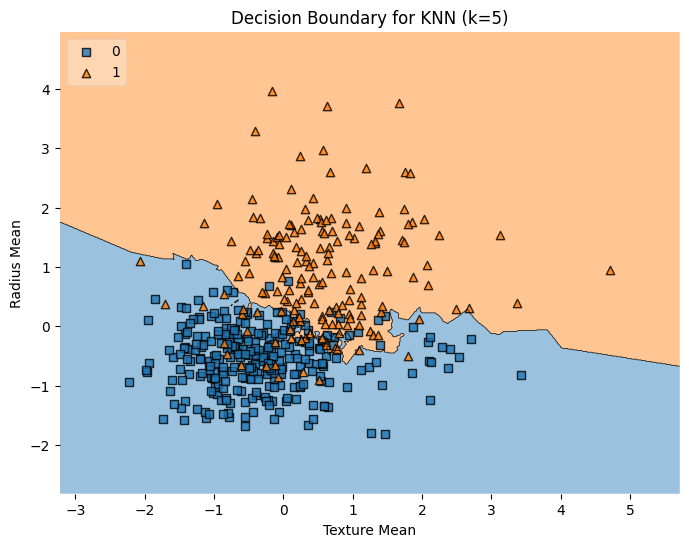

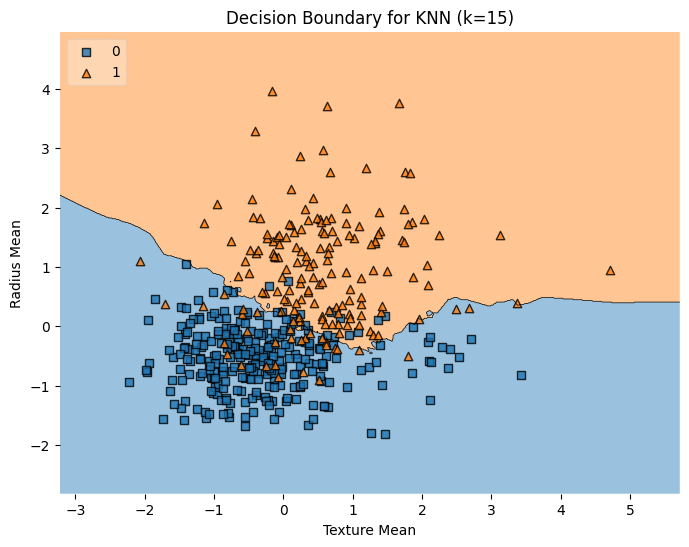

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

# Load the dataset
file_path = 'bdiag.csv'
df = pd.read_csv(file_path)

df.head()

# Encode 'diagnosis' column
label_mapping = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(label_mapping)

# Selecting relevant features
X = df[['texture_mean', 'radius_mean']]
y = df['diagnosis']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

y_pred = knn_5.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix (k=5):\n', cm)
print(classification_report(y_test, y_pred))

# Plotting decision boundary for k=5
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train.values, clf=knn_5, legend=2)
plt.title('Decision Boundary for KNN (k=5)')
plt.xlabel('Texture Mean')
plt.ylabel('Radius Mean')
plt.show()

# Plotting decision boundary for k=15
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train.values, clf=knn_15, legend=2)
plt.title('Decision Boundary for KNN (k=15)')
plt.xlabel('Texture Mean')
plt.ylabel('Radius Mean')
plt.show()
